In [1]:
from matplotlib.pylab import plt
import numpy as np
import os, fnmatch

In [24]:
def multiplot_gen_property_type():
    x = list(data.keys())

    y1=[]
    y2=[]
    y3=[]
    y4=[]
    y5=[]
    y6=[]
    
    for year in data.keys():
        for option_name, count in data[year].items():
            if option_name == 'domain':
                y1.append(count)
            if option_name == 'sitekey':
                y2.append(count)
            if option_name == 'third-party':
                y3.append(count)
            if option_name == 'websocket':
                y4.append(count)
            if option_name == 'webrtc':
                y5.append(count)
            if option_name == 'csp':
                y6.append(count)
    
                   
    plt.plot(x, y1,'-o',label='domain')
    plt.plot(x, y2,'-v',label='sitekey')
    plt.plot(x, y3,'-^',label='third-party')
    plt.plot(x, y4,'-<',label='websocket')
    plt.plot(x, y5,'->',label='webrtc')
    plt.plot(x, y6,'-1',label='csp')
    
    plt.xlabel('Year')
    plt.ylabel('Count')
    
    plt.title('Property Type variation for Easylist over years') 
    
    plt.legend(ncol=2)

    plt.show()
    

In [29]:
def multiplot_gen_content_type():
    x = list(data.keys())
    y1 =[]
    y2 =[]
    y3 =[]
    y4 =[]
    y5 =[]
    y6 =[]
    y7 =[]
    y8 =[]
    y9 =[]
    y10 =[]
    y11 =[]
    y12 =[]
    y13 =[]
    y14 =[]
    y15 =[]
    
    print("---",y1)
    
    for year in data.keys():
        for option_name, count in data[year].items():
            if option_name == 'script':
                y1.append(count)
            if option_name == 'xmlhttprequest':
                y2.append(count)
            if option_name == 'document':
                y3.append(count)
            if option_name == 'elemhide':
                y4.append(count)
            if option_name == 'subdocument':
                y5.append(count)
            if option_name == 'image':
                y6.append(count)
            if option_name == 'popup':
                y7.append(count)
            if option_name == 'ping':
                y8.append(count)
            if option_name == 'stylesheet':
                y9.append(count)
            if option_name == 'object':
                y10.append(count)
            if option_name == 'generichide':
                y11.append(count)
            if option_name == 'font':
                y12.append(count)
            if option_name == 'media':
                y13.append(count)
            if option_name == 'genericblock':
                y14.append(count)
            if option_name == 'other':
                y15.append(count)
    
    print("x-->",x)
    print("y-->",y1)
    print("y-->",y2)
    
    plt.plot(x, y1,'-h',label='script')
    plt.plot(x, y2,'-,',label='xmlhttprequest')
    plt.plot(x, y3,'-o',label='document')
    plt.plot(x, y4,'-v',label='elemhide')
    plt.plot(x, y5,'-^',label='subdocument')
    plt.plot(x, y6,'-<',label='image')
    plt.plot(x, y7,'->',label='popup')
    plt.plot(x, y8,'-1',label='ping')
    plt.plot(x, y9,'-2',label='stylesheet')
    plt.plot(x, y10,'-3',label='object')
    plt.plot(x, y11,'-4',label='generichide')
    plt.plot(x, y12,'-s',label='font')
    plt.plot(x, y13,'-p',label='media')
    plt.plot(x, y14,'-*',label='genericblock')
    plt.plot(x, y15,'-+',label='other')
    
    plt.xlabel('Year')
    plt.ylabel('Count')
    
    plt.title('Content Type variation for Easylist over years') 
    
    plt.legend(ncol=5)

    plt.show()

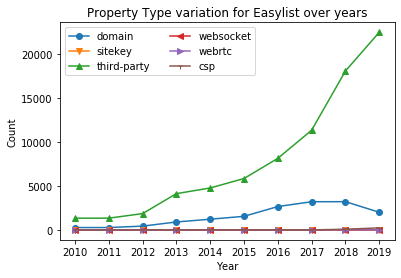

--- []
x--> ['2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019']
y--> [92, 92, 146, 282, 375, 550, 1571, 1990, 1967, 1443]
y--> [13, 13, 28, 74, 92, 159, 488, 693, 683, 567]


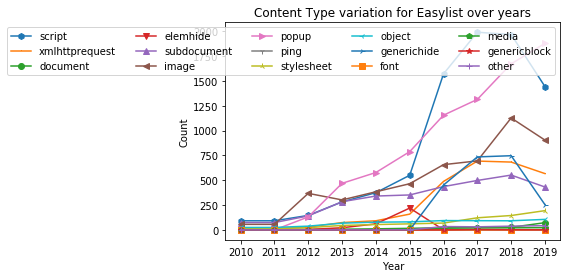

In [30]:
keyerror = set()
listOfFiles = os.listdir('/Users/prashanthikanniapanmurthy/Desktop/Evolution-of-tracker-blocking-lists/GraphCodes')
pattern = "processed-easylist-*.txt"

data_tmp={}
for entry in listOfFiles:
    if fnmatch.fnmatch(entry, pattern):
        with open(entry,"r") as fi:
            option_dict = \
                {
                    "domain": 0,
                    "script": 0,
                    "xmlhttprequest": 0,
                    "other": 0,
                    "document": 0,
                    "sitekey": 0,
                    "subdocument": 0,
                    "image": 0,
                    "ping": 0,
                    "elemhide": 0,
                    "popup": 0,
                    "stylesheet": 0,
                    "csp": 0,
                    "object": 0,
                    "generichide": 0,
                    "third-party": 0,
                    "font": 0,
                    "media": 0,
                    "websocket": 0,
                    "webrtc": 0,
                    "genericblock":0,
                }

            for line in fi:
                line = line.rstrip()

                option_separator_index = line.find("$")
                option = {}

                if option_separator_index >= 0:
                    options_list = line[option_separator_index + 1:]
                    while options_list != "":
                        option_full = ""
                        split = options_list.index(",") if "," in options_list else -1
                        if split == -1:
                            option_full = options_list
                            options_list = ""
                        else:
                            option_full = options_list[:split]

                        list_exists = option_full.index("=") if "=" in option_full else -1

                        # handle case for script, document, subdocument etc
                        if list_exists == -1:
                            if option_full[0] == '~':
                                try:
                                    if option_full[-1:] == '\\':
                                        option_full = option_full[:-1]
                                    option_dict[option_full[1:]] += 1
                                except KeyError as e:
                                    keyerror.add(str(e))

                            else:
                                try:
                                    if option_full[-1] == '\\':
                                        option_full = option_full[:-1]
                                    option_dict[option_full] += 1
                                except KeyError as e:
                                    keyerror.add(str(e))

                        # handle case for domains, site keys where there is a list
                        else:
                            option_name = option_full[:list_exists]
                            option_full = option_full[list_exists + 1:]
                            
                            if option_name:
                                try:
                                    if option_name[-1] == '\\':
                                        option_name = option_name[:-1]
                                    option_dict[option_name] += 1
                                except KeyError as e:
                                    keyerror.add(str(e))

                        options_list = options_list[split + 1:]


        details = entry.split("-")
        year = details[2]
        data_tmp.update({year:option_dict})
        data_tmp.update()
#         print(data.keys())

data = {}

listofTuples = sorted(data_tmp.items(), key=lambda x: x[0])

for elem in listofTuples:
    data.update({elem[0]:elem[1]})

# print(data)

multiplot_gen_property_type()
multiplot_gen_content_type()